In [1]:
#차원 축소 

from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

# 넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


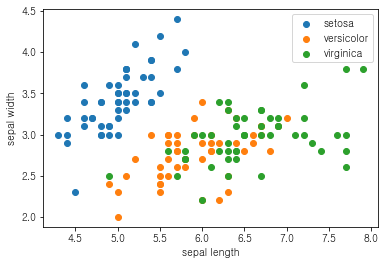

In [4]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
  x_axis_data = irisDF[irisDF['target'] == i]['sepal_length']
  y_axis_data = irisDF[irisDF['target'] == i]['sepal_width']
  plt.scatter(x_axis_data, y_axis_data, label=iris.target_names[i])
  
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [5]:
# PCA를 적용하기 전에 개별 속성을 함께 스케일링 해야 한다. 
# PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향을 받는다. 

from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [7]:
# PCA를 적용해 4차원(4개 속성)의 붓꽃 데이터를 2차원(2개의 PCA 속성) PCA 데이터로 변환한다. 
# PCA 클래스의 n_components 는 변환할 차원의 수를 의미 여기서는 2로 설정 

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [10]:
# 원본 데이터 세트를 (150, 2)의 데이터 세트로 iris_pca 객체 변수로 변환 
# iris_pca는 변환된 PCA 데이터 세트를 150 x 2 넘파이 행렬로 가지고 있다. 

pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


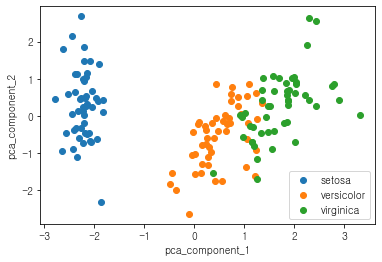

In [12]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
  x_axis_data = irisDF_pca[irisDF_pca['target'] == i]['pca_component_1']
  y_axis_data = irisDF_pca[irisDF_pca['target'] == i]['pca_component_2']
  plt.scatter(x_axis_data, y_axis_data, label=iris.target_names[i])
  
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [14]:
# pca_component_1 축을 기반으로 비교적 잘 구분이 되었다. 
# PCA component 별 원본 데이터의 변동성을 얼마나 반영하는지 확인한다. 
# PCA 변환을 수행한 PCA 객체의 explained_variance_ratio_ 속성은 전체 변동성에서 개별 PCA 컴포넌트별 차지하는 변동성 비율을 제공한다. 
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [16]:
# 첫 번째 PCA 변환 요소인 pca_component_1 이 전체 변동성의 약 72.9% 를 차지한다.
# 두 번째 PCA 변환 요소인 pca_component_2 가 전체 변동성의 약 22.8% 를 차지한다.

print(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1])
# 따라서 PCA를 2개 요소로만 변환해도 원본 데이터의 변동성을 95% 설명할 수 있다. 

0.9581320720000164


In [17]:
# 원본 붓꽃 데이터 세트와 PCA로 변환된 데이터 세트에 각각 분류를 적용한 후 결과를 비교한다. 
# Estimator는 RandomForestCalssifier를 이용한다. 
# cross_val_score() 로 3개의 교차 검증 세트로 정화도 결과를 비교한다. 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print("원본 데이터 교차 검증 개별 정확도", scores)
print("원본 데이터 교차 검증 평균 정확도", np.mean(scores))

원본 데이터 교차 검증 개별 정확도 [0.98 0.94 0.96]
원본 데이터 교차 검증 평균 정확도 0.96


In [18]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print("PCA 변환 데이터 교차 검증 개별 정확도", scores_pca)
print("PCA 변환 데이터 교차 검증 평균 정확도", np.mean(scores_pca))

# PCA 변환 차원 개수에 따라 예측 성능이 떨어질 수 밖에 없다. 
# 4개의 속성이 2개의 변환 속성으로 감소하면서 예측 성능의 정확도가 원본 데이터 대비 10% 하락했다. 
# 4개의 속성이 2개로, 속성 개수가 50% 감소한 것을 고려하면 PCA 변환 후 원본 데이터의 특성을 상당부분 유지하고 있음을 알 수 있다. 

PCA 변환 데이터 교차 검증 개별 정확도 [0.88 0.88 0.88]
PCA 변환 데이터 교차 검증 평균 정확도 0.88
